In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
# for google colab
# skip if working on jupyter notebook
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
# If working on jupyter notebook use:
# rmses_df = pd.read_csv('./Modeling/model_rmses.csv')
# rois_df = pd.read_csv('./Modeling/rois.csv')

rmses_df = pd.read_csv('/drive/My Drive/Stock_Forecasting/Modeling/model_rmses.csv')
rois_df = pd.read_csv('/drive/My Drive/Stock_Forecasting/Modeling/rois.csv')

In [4]:
rmses_df = rmses_df.drop('Unnamed: 0', axis=1)
rois_df = rois_df.drop('Unnamed: 0', axis=1)

In [5]:
rmses_df

,Model,NASDX_RMSEs,IVV_RMSEs,VFIAX_RMSEs,VTSAX_RMSEs,QQQ_RMSEs,SWPPX_RMSEs,SWTSX_RMSEs,FXAIX_RMSEs,VUG_RMSEs,DIA_RMSEs,SPY_RMSEs,VOO_RMSEs,VTWO_RMSEs
0,Baseline,2.047809,25.747396,23.754751,6.720160,22.488292,4.002403,4.794217,8.897243,18.027399,22.877579,25.613167,23.600016,15.034654
1,ARIMA,2.292706,36.026600,33.119191,7.658805,22.830807,5.890846,5.779298,12.634950,21.115098,20.143136,35.735622,32.937877,73.850636
2,LSTM,0.432891,4.124593,4.080433,1.077314,5.309794,0.691213,0.820236,1.460771,3.685428,2.945879,4.413672,3.852907,5.297022
3,FBprophet,5.670109,32.488233,31.884724,10.883668,63.844688,5.617840,7.457487,11.723050,41.450437,24.605617,35.484111,31.302444,102.428854


In [6]:
rois_df

,NASDX_ROI,IVV_ROI,VFIAX_ROI,VTSAX_ROI,QQQ_ROI,SWPPX_ROI,SWTSX_ROI,FXAIX_ROI,VUG_ROI,DIA_ROI,SPY_ROI,VOO_ROI,VTWO_ROI
0,0.267214,0.33298,0.400738,0.421071,0.318488,0.368498,0.508993,0.385973,0.293362,0.185695,0.424128,0.356532,0.953169


### Visualizing Modeling Results

In [7]:
rmses_df_copy = rmses_df.copy().set_index('Model')

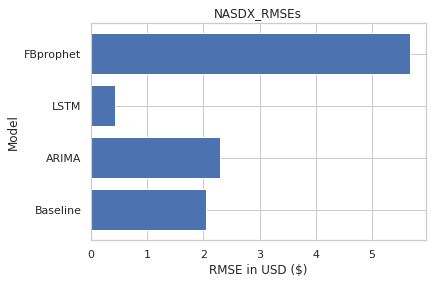

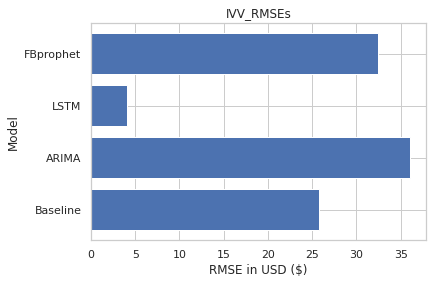

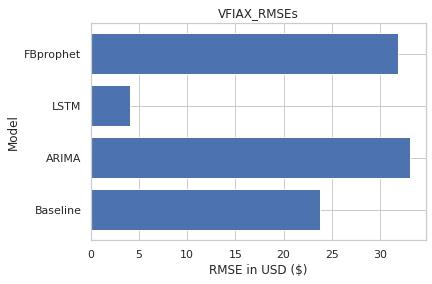

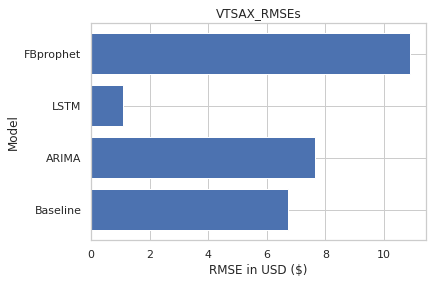

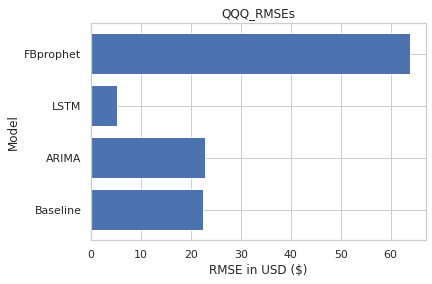

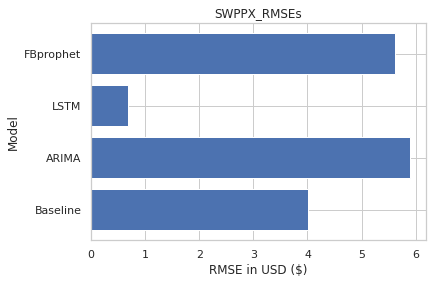

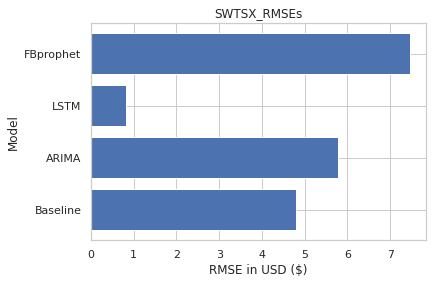

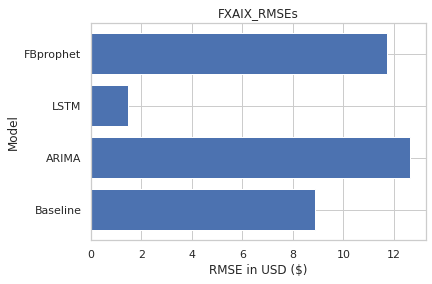

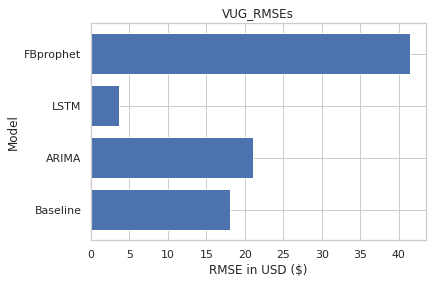

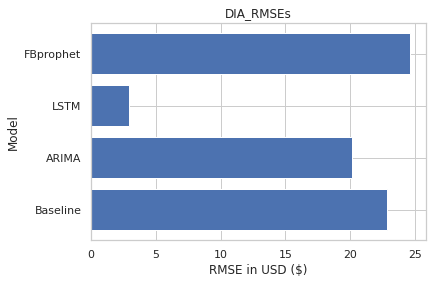

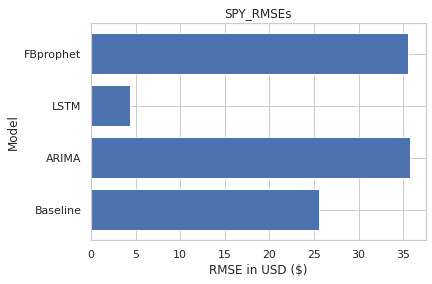

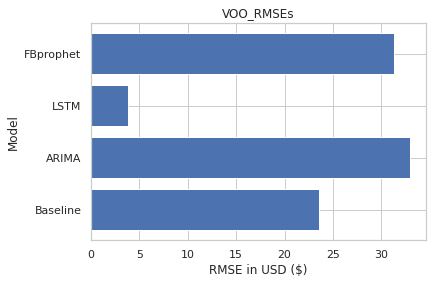

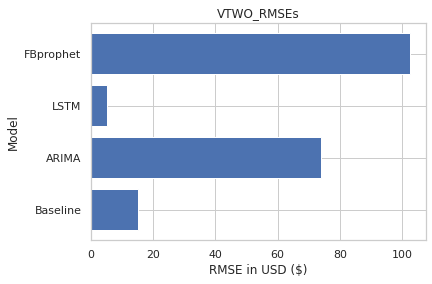

In [8]:
for col in rmses_df_copy.columns:
    plt.barh(rmses_df_copy.index,rmses_df_copy[col])
    plt.title(col)
    plt.xlabel('RMSE in USD ($)')
    plt.ylabel('Model')
    plt.show()

For all funds, the LSTM model was the best performing model that yielded the lowest RMSE. This means that the LSTM model will provide us with the most accurate predictions of close prices.

### Visualizing LSTM Models RMSEs

In [9]:
# shows values of bars on bar chart
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '$'+'{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [10]:
lstm_rmses = rmses_df.iloc[2,1:]
lstm_rmses_sorted = lstm_rmses.sort_values(ascending=False)
lstm_rmses_sorted

QQQ_RMSEs       5.30979
VTWO_RMSEs      5.29702
SPY_RMSEs       4.41367
IVV_RMSEs       4.12459
VFIAX_RMSEs     4.08043
VOO_RMSEs       3.85291
VUG_RMSEs       3.68543
DIA_RMSEs       2.94588
FXAIX_RMSEs     1.46077
VTSAX_RMSEs     1.07731
SWTSX_RMSEs    0.820236
SWPPX_RMSEs    0.691213
NASDX_RMSEs    0.432891
Name: 2, dtype: object

In [11]:
lstm_rmses_sorted.index = ['NASDX','IVV','VFIAX','VTSAX','QQQ','SWPPX','SWTSX','FXAIX','VUG','DIA','SPY','VOO','VTWO']

In [12]:
lstm_rmses_sorted

NASDX     5.30979
IVV       5.29702
VFIAX     4.41367
VTSAX     4.12459
QQQ       4.08043
SWPPX     3.85291
SWTSX     3.68543
FXAIX     2.94588
VUG       1.46077
DIA       1.07731
SPY      0.820236
VOO      0.691213
VTWO     0.432891
Name: 2, dtype: object

In [13]:
lstm_rmses_sorted = pd.DataFrame(lstm_rmses_sorted).reset_index()
lstm_rmses_sorted.columns = ['Ticker','RMSE']
lstm_rmses_sorted

,Ticker,RMSE
0,NASDX,5.30979
1,IVV,5.29702
2,VFIAX,4.41367
3,VTSAX,4.12459
4,QQQ,4.08043
5,SWPPX,3.85291
6,SWTSX,3.68543
7,FXAIX,2.94588
8,VUG,1.46077
9,DIA,1.07731


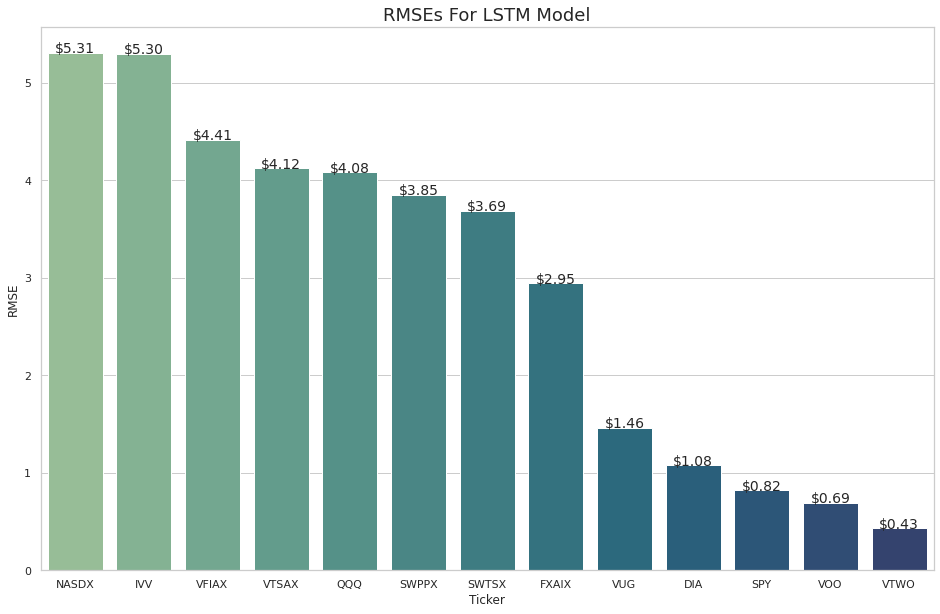

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('RMSEs For LSTM Model',fontsize=18)
sns.barplot(x="Ticker", y="RMSE", data=lstm_rmses_sorted,ax=ax, palette='crest')
show_values_on_bars(ax);

### Visualizing ROIs
In order to make our recommendations on which funds investors should consider, we need to look at ROIs for all the funds. We will recommend the top 3 funds. The ROIs will give us information on the projected 1 year growth for the funds. 

In [15]:
rois_df = rois_df.T

In [16]:
rois_df.index = ['NASDX','IVV','VFIAX','VTSAX','QQQ','SWPPX','SWTSX','FXAIX','VUG','DIA','SPY','VOO','VTWO']
rois_df.columns = ['ROI %']

In [17]:
sorted_roi = rois_df['ROI %'].sort_values(ascending=False)
sorted_roi = pd.DataFrame(sorted_roi).reset_index()
sorted_roi.columns = ['Ticker','ROI %']
sorted_roi['ROI %'] = sorted_roi['ROI %']*100
sorted_roi

,Ticker,ROI %
0,VTWO,95.316911
1,SWTSX,50.899325
2,SPY,42.412755
3,VTSAX,42.107067
4,VFIAX,40.073765
5,FXAIX,38.597268
6,SWPPX,36.849808
7,VOO,35.653162
8,IVV,33.297988
9,QQQ,31.848775


In [18]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height()) + '%'
            ax.text(_x, _y, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

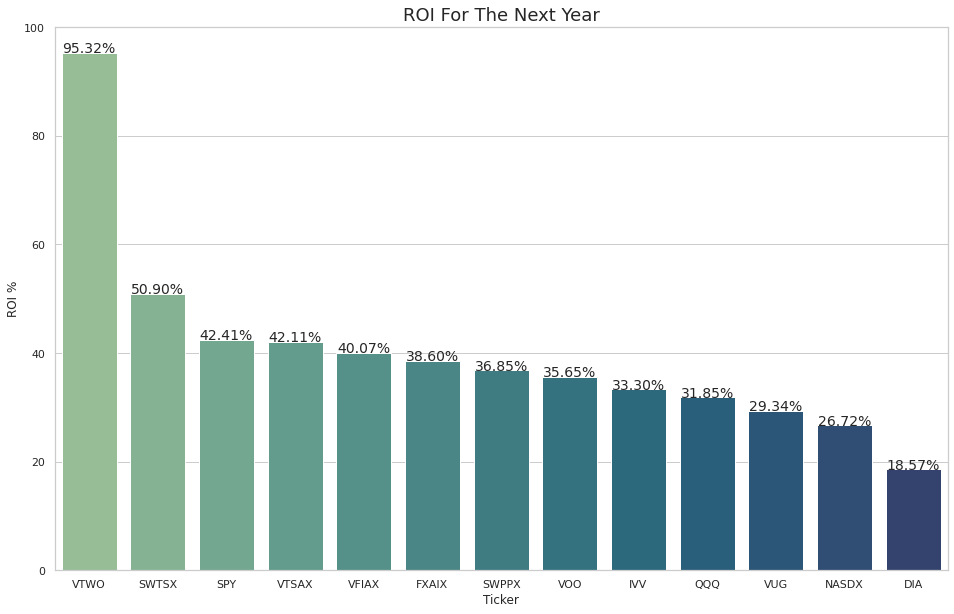

In [19]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('ROI For The Next Year',fontsize=18)
sns.barplot(x="Ticker", y="ROI %", data=sorted_roi,ax=ax, palette='crest')
show_values_on_bars(ax);

### Conclusion
The graph shows us the the ROIs of the close price for each fund over the next year. Based on the ROIs, I will recommend the top 3 funds worth purchasing are VTWO, SWTSX, and SPY.